# Plot rSO2 as a function of MAP

See if anything resembling a Lassen curve is visible

Simo Mäkelä  
Helsinki Metropolia University of Applied Sciences  
4.10.2020

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from utils import zoll
from utils import nirs
from utils import misc
from utils.autoscale import autoscale

In [2]:
# parameters
case_id = 1

In [3]:
case_str = str(case_id).zfill(5)
datafile = 'output/' + case_str + '_3.csv'

In [4]:
# load data
df = pd.read_csv(datafile,
                 sep = ',',
                 na_values = ['-'],
                 parse_dates = ['Time'])
misc.NormalizeTime(df)
df.set_index('Time', inplace=True)
mark_timestamp = df.loc[df['Mark'] == 1].index[0]

In [5]:
# dropout
df['rSO2'] = np.where(df['Bad_rSO2_manual'] == 1, np.nan, df['rSO2'])
df['MAP'] = np.where(df['Bad_MAP_auto'] == 1, np.nan, df['MAP'])
df['MAP'] = np.where(df['Bad_MAP_manual'] == 1, np.nan, df['MAP'])

In [6]:
# smooth rSO2 to match MAP
df['rSO2'] = df['rSO2'].rolling(10).mean()

In [7]:
# resampling as per Ono, Joshi, Brady, Easley et al. 2012
df['MAP_resampled'] = df['MAP'].resample('10s').mean()
df['rSO2_resampled'] = df['rSO2'].resample('10s').mean()

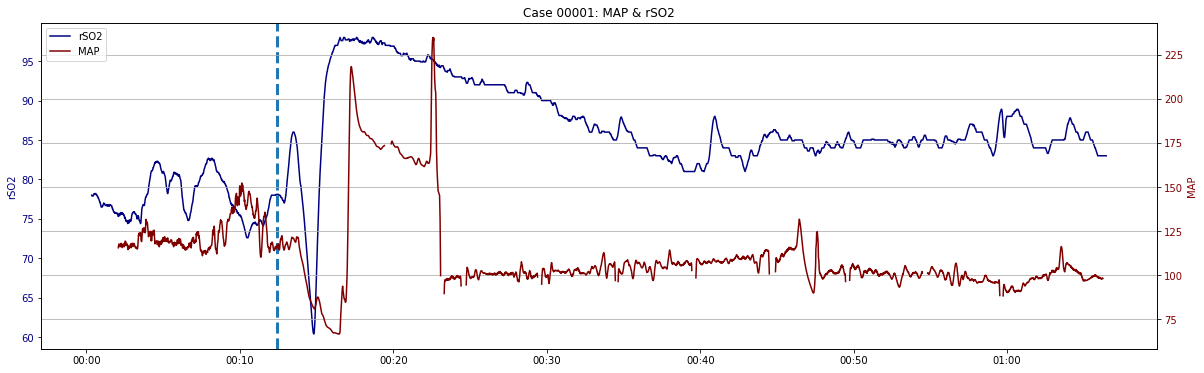

In [8]:
fig, ax1 = plt.subplots(figsize=(20,6))
ax1.set_ylabel('rSO2', color='navy')
line1 = ax1.plot(df.index, df['rSO2'], color='navy', label='rSO2')
ax1.tick_params(axis='y', labelcolor='navy')
ax2 = ax1.twinx()
ax2.xaxis.set_major_formatter(mpl.dates.DateFormatter('%H:%M'))
ax2.set_ylabel('MAP', color='maroon')
line2 = ax2.plot(df.index, df['MAP'], color='maroon', label='MAP')
ax2.tick_params(axis='y', labelcolor='maroon')
lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc='upper left')
ax2.grid()
plt.title(f'Case {case_str}: MAP & rSO2')
ax1.axvline(mark_timestamp, linestyle='--', linewidth=3)
plt.autoscale(enable=True, axis="x", tight=True)
plt.savefig(f'reports/images/4_{case_str}_01.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

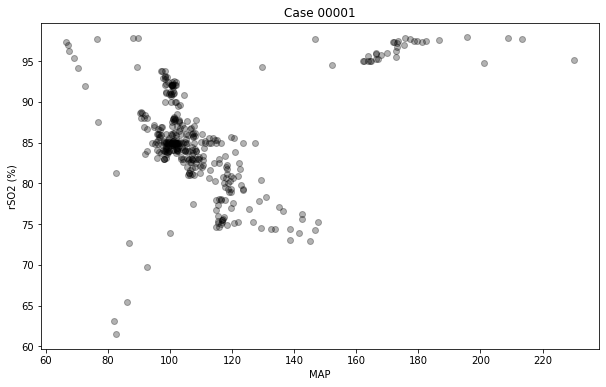

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(df['MAP_resampled'], df['rSO2_resampled'], alpha=0.3, c='k')
plt.title(f'Case {case_str}')
ax.set_xlabel('MAP')
ax.set_ylabel('rSO2 (%)')
plt.savefig(f'reports/images/4_{case_str}_02.png', bbox_inches='tight', pad_inches=0.1)
plt.show()